#### Relevant docs:

Explanation of DBSCAN: https://becominghuman.ai/dbscan-clustering-algorithm-implementation-from-scratch-python-9950af5eed97 

DBSCAN implementation: https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/

Difference with kmeans: https://www.geeksforgeeks.org/difference-between-k-means-and-dbscan-clustering/

kmeans: https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import seaborn as sns
from random import randint

C:\Users\rodri\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# TO DO: Change path to your file

avon_somerset_path = 'A://Chrome Downloads A/Jan_2010_Oct_2021/Jan_2010_Oct_2021/2020-01/2020-01-avon-and-somerset-outcomes.csv'
met = 'A://Chrome Downloads A/Jan_2010_Oct_2021/Jan_2010_Oct_2021/2020-01/2020-01-metropolitan-outcomes.csv'

df_avon = pd.read_csv(avon_somerset_path)
df_met = pd.read_csv(met)
df_avon.head();

In [3]:
#filter out items with longitude/latitude is NaN

#df = df[df['Longitude'].isnull() == False]
#df = df[df['Latitude'].isnull() == False]

#This dataset had some outliers, I deleted them out of convenience

#df = df[(df['Longitude']< -2) == True]
#df = df[(df['Latitude'] < 52) == True]
#df = df[(df['Latitude'] > 50.5) == True]
#df.head();

In [4]:
def cleanOutliers(data, columns=["Longitude", "Latitude"], sd=2):
    """
    Removes outliers more than x standard deviations away from the 1st or 3rd quantiles. x=2 by default.
    Could be modified to median instead of 1/3 quantiles.
    Also removes NaNs.
    
    """
    
    df = data
    
    for col in columns:
        df = df[df[col].isnull() == False]
        df = df[df[col] > df[col].quantile(0.25) - sd*df[col].std()]
        df = df[df[col] < df[col].quantile(0.75) + sd*df[col].std()]
        
    print("Data points lost:", data.shape[0] - df.shape[0])
    return df
    

In [5]:
#Most are lost due to NaN.
#Clean
df_clean = cleanOutliers(df_avon, ["Longitude", "Latitude"], 2)
df_clean.describe()

Data points lost: 922


,Longitude,Latitude
count,5990.000000,5990.000000
mean,-2.695561,51.321314
std,0.231695,0.191743
min,-3.439794,50.844203
25%,-2.943615,51.161361
50%,-2.605764,51.404692
75%,-2.546531,51.463010
max,-2.251862,51.652254


In [6]:
#Raw
df_avon[["Longitude", "Latitude"]].describe()

,Longitude,Latitude
count,6061.000000,6061.000000
mean,-2.702908,51.320642
std,0.246748,0.196817
min,-3.647548,50.355245
25%,-2.954216,51.163170
50%,-2.606999,51.401391
75%,-2.548140,51.462691
max,-0.749240,53.360855


In [7]:
def colorList(n):
    """
    Generates a list of n random colors.
    """
    color = []

    for i in range(n):
        color.append('#%06X' % randint(0, 0xFFFFFF))
    return color

## 1. Epsilon (EPS)
This is the radius of the circle that we must draw around our pointing focus.

If Epsilon is very small, n of clusters will increase as bigger clusters will become harder to find. > Many small clusters.

If Epsilon is very large, n of clusters will decrease as few clusters will be able to contain many data points. > Few large clusters

## 2. Minimum number of points (MIN_SAMPLES)
This is the number of points that we want in the neighbourhood of our point in focus (within the circle).

Minimum number of points necessary to form a cluster.

Small MIN_SAMPLES > More small clusters

Large MIN_SAMPLES > More outliers (red), Fewer clusters

In [8]:
def dbscan(DATA, EPS, MIN_SAMPLES):
    
    data = DATA.loc[:, ['Longitude', 'Latitude']]
    X = data.values
    
    db = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    print("Unique labels:", len(unique_labels))
    
    colors = colorList(len(unique_labels))
    print(len(colors))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'red'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k',
                 markersize=6)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k',
                 markersize=6)
        #plt.xlim(min(X[:,0]),max(X[:,0]))
        #plt.ylim(min(X[:, 1]),max(X[:,1]))

    plt.title('number of clusters: %d' % n_clusters_)
    plt.show()
    sns.scatterplot(X[:,0], X[:,1])
    
    #sns.scatterplot(X[:,0], X[:,1])
    #g = sns.scatterplot(X[:,0], X[:,1])
    #g.set(xlim=(min(X[:,0]),max(X[:,0])))
    #g.set(ylim=(min(X[:, 1]),max(X[:,1])));


In [9]:
# 0.03, 2

Red points represent noise that is not part of any cluster.

Data points lost: 922
Unique labels: 57
57


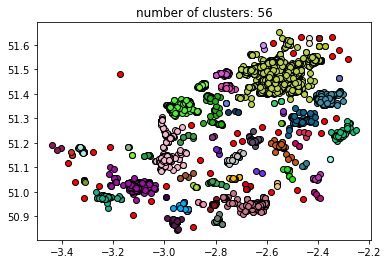

C:\Users\rodri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Wall time: 685 ms


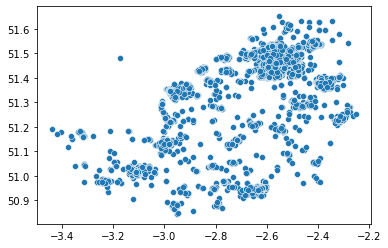

In [18]:
%%time
epsilon = 0.03
minimum = 2

dbscan(cleanOutliers(df_avon), epsilon, minimum);

Data points lost: 922


C:\Users\rodri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rodri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-13-b8ba08290bb3>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


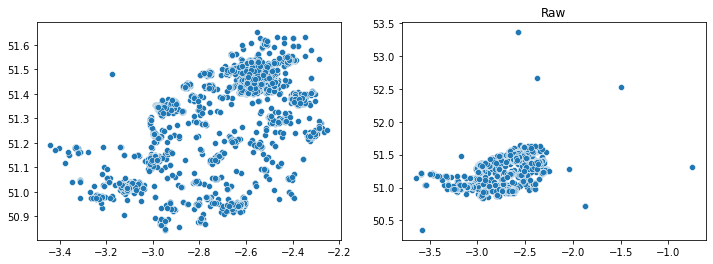

In [13]:
# Raw data points
df = df_avon

df_raw = df[df['Longitude'].isnull() == False]
df_raw = df_raw[df_raw['Latitude'].isnull() == False]
X_raw = df_raw.loc[:, ['Longitude', 'Latitude']].values

# Clean data points
df_clean = cleanOutliers(df) #Default clean settings
X_clean = df_clean.loc[:, ['Longitude', 'Latitude']].values

# Clean vs Raw data comparison
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.scatterplot(X_raw[:,0], X_raw[:,1], ax=ax[1])
sns.scatterplot(X_clean[:,0], X_clean[:,1], ax=ax[0])
plt.title("Raw")
fig.show()